In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Genre/SMS/spam.csv",encoding='latin-1')

In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df=df.rename(columns={'v1':'label','v2':'text'})

In [ ]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['label'].value_counts()

,count
label,
ham,4825
spam,747


In [ ]:
ham_samples = df[df['label'] == 'ham'].sample(n=747, random_state=42)
spam_samples = df[df['label'] == 'spam']

# Combine back into a balanced DataFrame
balanced_data = pd.concat([ham_samples, spam_samples])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
df=balanced_data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])  # cleaned_sms_messages is your preprocessed data


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
y = df['label']  # your labels (1 for spam, 0 for ham)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)


MultinomialNB()

In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)


LogisticRegression()

In [ ]:
from sklearn.svm import SVC

model_svm = SVC()
model_svm.fit(X_train, y_train)


SVC()

In [ ]:
from sklearn.metrics import classification_report

for model in [model_nb, model_lr, model_svm]:
    y_pred = model.predict(X_test)
    print(f'{model}\n',classification_report(y_test, y_pred))


MultinomialNB()
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       145
           1       0.98      0.95      0.96       154

    accuracy                           0.96       299
   macro avg       0.96      0.96      0.96       299
weighted avg       0.96      0.96      0.96       299

LogisticRegression()
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       145
           1       1.00      0.88      0.94       154

    accuracy                           0.94       299
   macro avg       0.94      0.94      0.94       299
weighted avg       0.95      0.94      0.94       299

SVC()
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       145
           1       1.00      0.88      0.93       154

    accuracy                           0.94       299
   macro avg       0.94      0.94      0.94       299
weighted avg       0.94     

Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.96


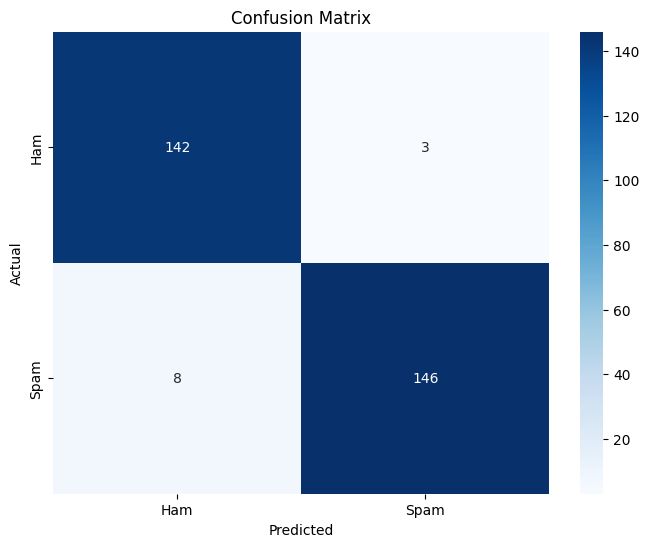

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Assuming y_test and y_pred are your true labels and predicted labels
y_pred = model_nb.predict(X_test)  # Replace with the model you're using

# Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
accuracy = report['accuracy']
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()



Accuracy: 0.94
Precision: 0.95
Recall: 0.94
F1 Score: 0.94


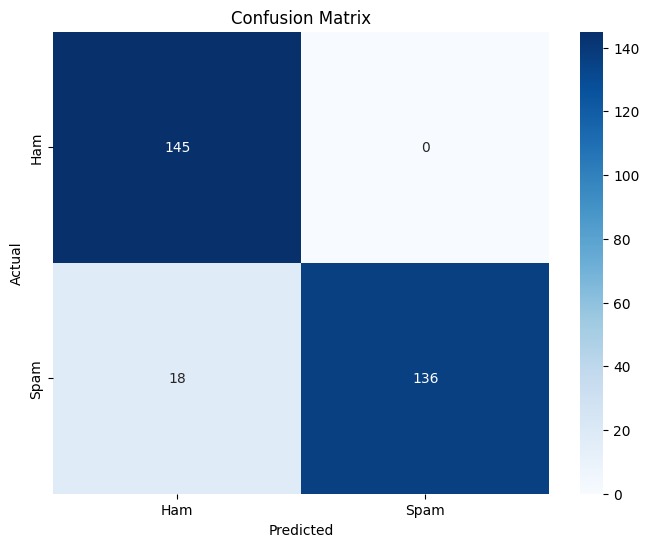

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Assuming y_test and y_pred are your true labels and predicted labels
y_pred = model_lr.predict(X_test)  # Replace with the model you're using

# Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
accuracy = report['accuracy']
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()



Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 Score: 0.94


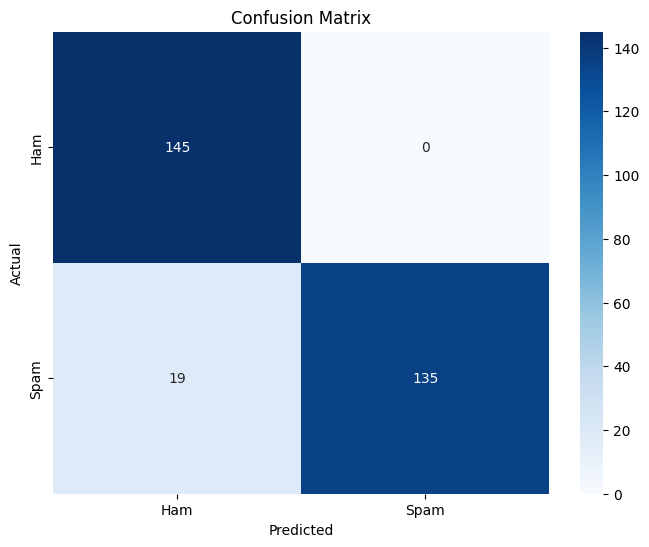

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Assuming y_test and y_pred are your true labels and predicted labels
y_pred = model_svm.predict(X_test)  # Replace with the model you're using

# Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
accuracy = report['accuracy']
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'],
            yticklabels=['Ham', 'Spam'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

